In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("gpt_dataset.csv")

In [4]:
df.head()

,Category,Resume
0,Frontend Developer,"As a seasoned Frontend Developer, I have a pro..."
1,Backend Developer,With a solid background in Backend Development...
2,Python Developer,"As a Python Developer, I leverage my expertise..."
3,Data Scientist,"With a background in Data Science, I possess a..."
4,Frontend Developer,Experienced Frontend Developer with a passion ...


In [5]:

df.sample(5)

,Category,Resume
54,Machine Learning Engineer,Dynamic Machine Learning Engineer with a backg...
323,Full Stack Developer,Skilled Full Stack Developer with a strong fou...
49,Machine Learning Engineer,Passionate Machine Learning Engineer with a st...
388,Cloud Engineer,Skilled Cloud Engineer with a focus on buildin...
183,Mobile App Developer (iOS/Android),Experienced Mobile App Developer specializing ...


In [6]:

df.shape


(400, 2)

In [7]:

df['Category'].unique()

array(['Frontend Developer', 'Backend Developer', 'Python Developer',
       'Data Scientist', 'Full Stack Developer',
       'Mobile App Developer (iOS/Android)', 'Machine Learning Engineer',
       'Cloud Engineer'], dtype=object)

In [8]:
df['Category'].value_counts()

,count
Category,
Backend Developer,57
Cloud Engineer,56
Frontend Developer,54
Data Scientist,53
Full Stack Developer,47
Python Developer,45
Mobile App Developer (iOS/Android),45
Machine Learning Engineer,43


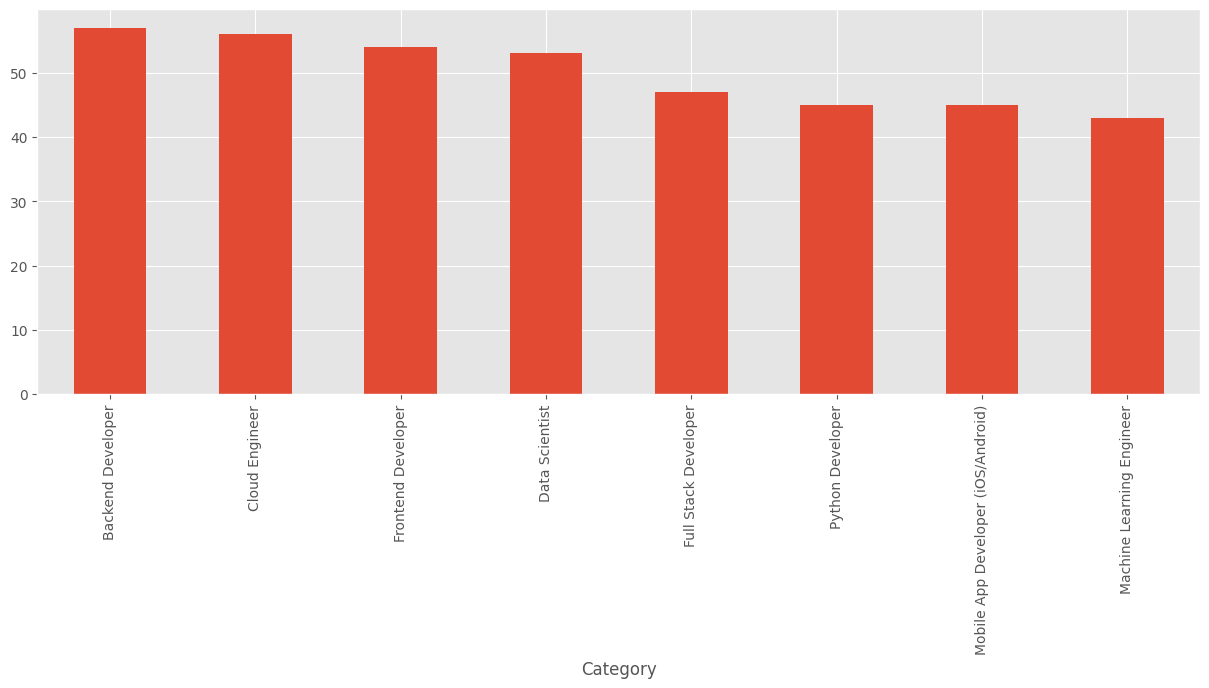

In [9]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind="bar")
plt.show()

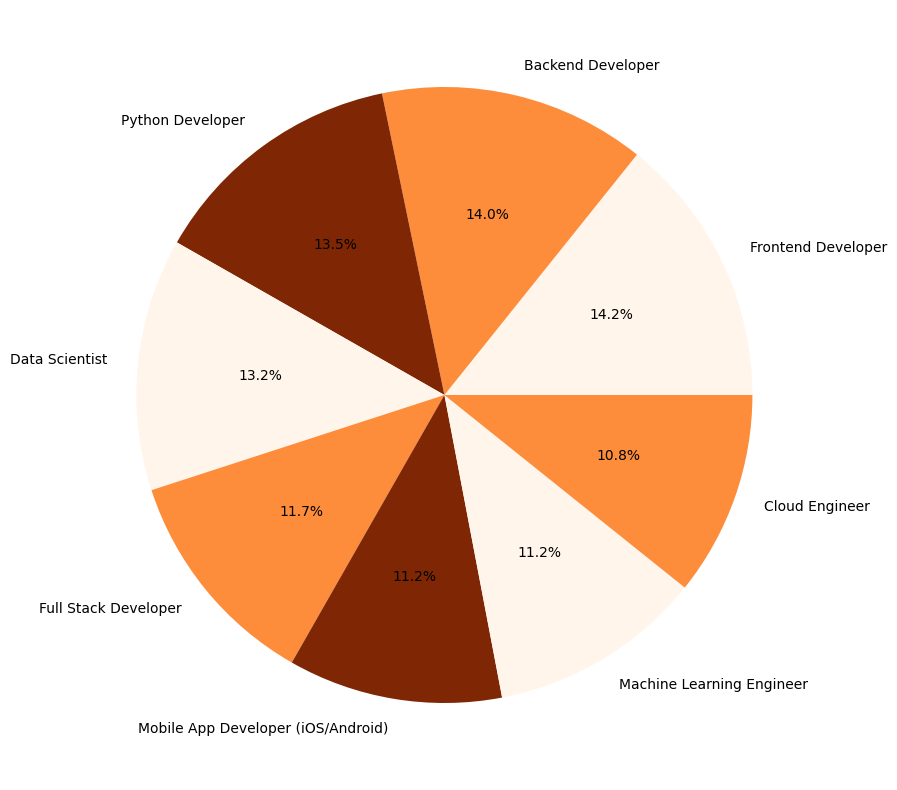

In [10]:

counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

In [11]:
df['Resume'][0]

'As a seasoned Frontend Developer, I have a proven track record of crafting stunning and responsive user interfaces for web applications. With over 5 years of experience, I am proficient in HTML, CSS, and JavaScript, and I have a deep understanding of modern frontend frameworks such as React, Vue.js, and Angular. I excel in translating design mockups into pixel-perfect, cross-browser compatible UIs, ensuring an optimal user experience across devices. Additionally, I am well-versed in CSS preprocessors like Sass and LESS, enabling me to write clean and maintainable stylesheets. My passion for UI/UX design drives me to stay updated with the latest trends and best practices in the industry, allowing me to create visually appealing and intuitive interfaces that engage users. I am a collaborative team player with excellent communication skills, able to work closely with designers, backend developers, and stakeholders to deliver high-quality frontend solutions on time and within budget.'

In [12]:
def clean(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    clean_text = url_pattern.sub('', text)
    clean_text = email_pattern.sub('', clean_text)

    clean_text = re.sub('[^\w\s]', '', clean_text)
    stop_words = set(stopwords.words('english'))
    clean_text  = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

    return clean_text


In [13]:
s = 'Hello, $%& I found this # article at https://www.sam.com ! You can contact me at sam@example.com'

In [17]:
clean(s)

'Hello found article contact'

In [18]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [19]:
df['Resume'][0]

'seasoned Frontend Developer proven track record crafting stunning responsive user interfaces web applications 5 years experience proficient HTML CSS JavaScript deep understanding modern frontend frameworks React Vuejs Angular excel translating design mockups pixelperfect crossbrowser compatible UIs ensuring optimal user experience across devices Additionally wellversed CSS preprocessors like Sass LESS enabling write clean maintainable stylesheets passion UIUX design drives stay updated latest trends best practices industry allowing create visually appealing intuitive interfaces engage users collaborative team player excellent communication skills able work closely designers backend developers stakeholders deliver highquality frontend solutions time within budget'

In [20]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df['Category'].unique()

array([3, 0, 7, 2, 4, 6, 5, 1])

In [22]:
tfidf = TfidfVectorizer()
tfidf.fit(df['Resume'])
resume = tfidf.transform(df['Resume'])

In [23]:
X_train , X_test, y_train , y_test = train_test_split(resume, df['Category'], test_size = 0.2, random_state = 42)


In [24]:
X_train.shape


(320, 1163)

In [25]:
y_train.shape

(320,)

In [26]:

X_test.shape

(80, 1163)

In [27]:
y_test.shape

(80,)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuarcy of the KNN Classifier on test data-> : {accuracy}")

Accuarcy of the KNN Classifier on test data-> : 0.975


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [30]:
models = {
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsRestClassifier': OneVsRestClassifier(KNeighborsClassifier())
}

In [31]:
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"Accuarcy of {model_name} on test data: {accuracy}")

Accuarcy of KNeighborsClassifier on test data: 0.975
Accuarcy of LogisticRegression on test data: 1.0
Accuarcy of RandomForestClassifier on test data: 1.0
Accuarcy of SVC on test data: 1.0
Accuarcy of MultinomialNB on test data: 0.9625
Accuarcy of OneVsRestClassifier on test data: 0.975


In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
myresume = """Education Details
May 2011 to May 2014 Bachelor of science Information technology Mumbai, Maharashtra Mumbai university
Oracle DBA

Oracle database administrator
Skill Details
Installation of Oracle on RH Linux & Windows. Creating/Managing user profiles and analyzing their privileges and tablespace quotas Backup of database Logical and Physical procedures. Recovery of database in case of database crash, disk/media failure, etc. Standard DBA functions like space management, Rollback segments, Extents. Database Management and Monitoring the database. Willing to learn new things. Being a constructive team member, contributing practically to the success of the team.- Exprience - 48 monthsCompany Details
company - Accelya kale solutions ltd
description - Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Database Up-gradation from Oracle 11g to Oracle 12c.
Installation of Database critical patches.
Taking cold and hot backups on scheduled times and monitoring backups.
Importing the export dump to another database as per demands.
Automating most of the daily activities through cronjobs, shell scripts or schedulers.
Making Plan of Actions for Various Activities.
Raising SR with Oracle Support for different severity issues.
Handling the Userâ€™s request and proper client interaction.
Monitoring & managing database growth, tablespaces, adding ,resizing and renaming the datafiles.
Restoration of database using RMAN backups for backup consistency checks.
Migration of Database using export / import and RMAN backups.
Configuring & managing Physical Standby database.
Creating database links, Tablespaces, database directories.
Managing network settings through listener.ora and tnsnames.ora files.
Restoration of data using old logical backup as per client request.
Schema replication across databases through data pump tool.
Taking cold and hot backups on scheduled times and monitoring backups
Taking EXPDP of database, database objects and a particular schema
Using SCP ticketing tool in order keeping track of client requests.Â
Performing Maintenance Activities such as Index Rebuilding and stats gather.
Troubleshooting the Basic LevelÂ performance issuesÂ
Setting up a new environmentÂ from database perspective within the requested timelines
Adding/Deleting disks in ASM and monitoring the ASM diskgroups.
Creating users & privileges with appropriate roles and levels of security.Â
Database Administrator working in 24*7 support environment maintaining Databases running on Oracle 11g, 12c.
Performing database online and offline database re-organization for database enhancement.Â
Migrating database from Non-ASM to ASM file system.
Grid up-gradation from 11g to 12C.
company - Insolutions Global Ltd
description - Oracle software installation(graphical/silent),Database upgrade,Patch upgrade.
Maintaining around 80+ UAT DB servers, 40 production DB and 28 standby/DR DB.
Managing/creating DR & standby servers, DB sync.
Backup and recovery (RMAN/ Datapump).
Performing activities like switchover and failover .
Allocating system storage and planning future storage requirements for the database system
Enrolling users and maintaining system security.
Monitoring Alert log, Snap ID generation, db size, Server space, OEM reports, User validity.
Controlling and monitoring user access to the database .
Scheduling shell scripts or dbms_jobs using Crontab or DBMS_SCHEDULER (monitoring script, listener check, backup script, AWR reports) etc.
Planning for backup and recovery of database.
Managing the production database for Oracle and SQL Server and resize the space of database/Datafiles/Tablespace/Transactional Logs.
Managing Temp and Undo tablespaces.
Creating primary database storage structures (tablespaces) after application developers have designed an application."""

In [34]:

df.head()

,Category,Resume
0,3,seasoned Frontend Developer proven track recor...
1,0,solid background Backend Development bring 7 y...
2,7,Python Developer leverage expertise Python pro...
3,2,background Data Science possess unique blend a...
4,3,Experienced Frontend Developer passion craftin...


In [35]:
cleaned_resume = clean(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
category_map = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_map.get(prediction_id, "Unknown")
print("Predicted Category is-> ", category_name)

Predicted Category is->  Advocate


In [36]:

import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))